<a href="https://colab.research.google.com/github/AnshDhingraAD/EVOLVAI/blob/main/PEC_MODEL_PART(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


0: 448x800 2 heads, 3 helmets, 821.0ms
Speed: 5.5ms preprocess, 821.0ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


Detected class: 1.0, Coordinates: (1087.461181640625, 0.0, 1198.9266357421875, 116.17298126220703), Score: 0.83
Detected class: 0.0, Coordinates: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547), Score: 0.73
Detected class: 1.0, Coordinates: (559.6072998046875, 52.61311340332031, 605.01123046875, 103.85501861572266), Score: 0.61
Detected class: 1.0, Coordinates: (791.2635498046875, 34.469993591308594, 840.9873046875, 88.33531951904297), Score: 0.57
Detected class: 0.0, Coordinates: (471.99444580078125, 24.15648651123047, 558.0444946289062, 145.5758514404297), Score: 0.55
Biker box: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547) vs Helmet box: (1087.461181640625, 0.0, 1198.9266357421875, 116.17298126220703)
Biker box: (250.9716339111328, 29.742782592773438, 315.4530944824219, 109.88622283935547) vs Helmet box: (559.6072998046875, 52.61311340332031, 605.01123046875, 103.85501861572266)
Biker box: (250.9716339111328, 29.7427825

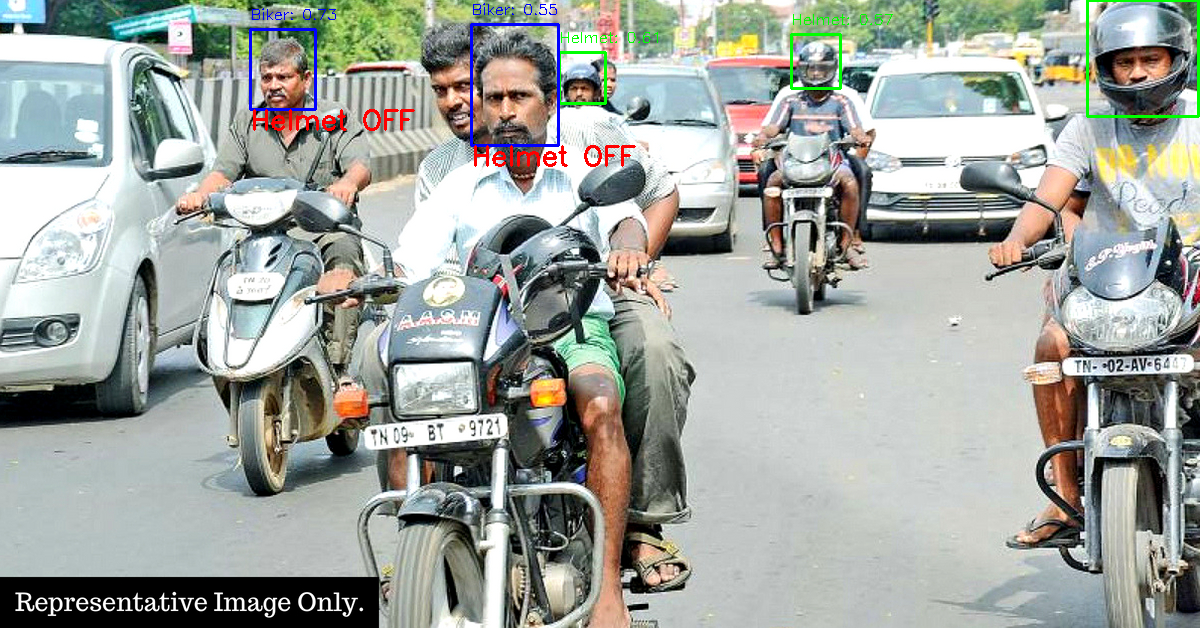

Number of 2-wheelers not wearing helmets: 2


In [47]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the pre-trained YOLO model
model = YOLO('/content/hemletYoloV8_25epochs.pt')  # Adjust path to your trained model

# Load the image
image_path = '/content/WhatsApp Image 2024-12-29 at 1.41.39 AM.jpeg'  # Replace with your image path
frame = cv2.imread(image_path)

# Define class IDs based on your YOLO model's labels
biker_class_id = 0  # Class ID for biker (2-wheeler)
helmet_class_id = 1  # Class ID for helmet

# Initialize counters
helmet_on_count = 0
helmet_off_count = 0

# Perform detection
results = model(frame, conf=0.5)

# Separate detections for bikers and helmets
biker_boxes = []
helmet_boxes = []

for detection in results[0].boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    print(f"Detected class: {class_id}, Coordinates: ({x1}, {y1}, {x2}, {y2}), Score: {score:.2f}")  # Debug print
    if int(class_id) == biker_class_id:
        biker_boxes.append((x1, y1, x2, y2, score))
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue box for bikers
        cv2.putText(frame, f"Biker: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    elif int(class_id) == helmet_class_id:
        helmet_boxes.append((x1, y1, x2, y2, score))
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green box for helmets
        cv2.putText(frame, f"Helmet: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Match helmets with bikers
for biker in biker_boxes:
    bx1, by1, bx2, by2, bscore = biker
    helmet_found = False

    for helmet in helmet_boxes:
        hx1, hy1, hx2, hy2, hscore = helmet

        # Debug: print the box coordinates of bikers and helmets being compared
        print(f"Biker box: ({bx1}, {by1}, {bx2}, {by2}) vs Helmet box: ({hx1}, {hy1}, {hx2}, {hy2})")

        # Check if helmet overlaps with biker (simple overlap test)
        if not (hx2 < bx1 or hx1 > bx2 or hy2 < by1 or hy1 > by2):  # Intersection
            helmet_found = True
            print(f"Helmet found for biker at ({bx1}, {by1}, {bx2}, {by2})")  # Debug print
            break

    if helmet_found:
        helmet_on_count += 1
        label = "Helmet ON"
        color = (0, 255, 0)  # Green for helmet detected
    else:
        helmet_off_count += 1
        label = "Helmet OFF"
        color = (0, 0, 255)  # Red for helmet not detected

    # Add label to biker box
    cv2.putText(frame, label, (int(bx1), int(by2) + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Display the results
cv2_imshow(frame)

# Print the statistics
print(f"Number of 2-wheelers not wearing helmets: {helmet_off_count}")

# Release resources
cv2.destroyAllWindows()
